# ⚛️ H₂ VQE — Noisy Optimizer Comparison (Production API)

This notebook compares **classical optimizers** for **H₂ VQE** under different
**noise channels**, using only the **packaged VQE API**.

We will run **multi-seed noise statistics** and compare optimizers by:

- Mean and standard deviation of the **energy error**:  ΔE = E_noisy − E_ref
- Mean and standard deviation of the **fidelity** vs a noiseless reference state
- Across a grid of **noise strengths**

The key entry point used here is:

```python
from vqe.core import run_vqe_optimizer_comparison
```

---

## What this notebook does (and does not) do

✅ Uses **only** production package functions (no hand-built QNodes).  
✅ Uses **multi-seed statistics** for robustness.  
✅ Produces **overlay plots**: one curve per optimizer.  

❌ Does not manually implement VQE loops inside the notebook.  
❌ Does not implement new noise models beyond what the package already supports.

In [14]:
import numpy as np

from vqe.core import run_vqe_optimizer_comparison

### Experiment defaults

- Molecule: **H₂**
- Ansatz: **UCCSD**
- Mapping: **Jordan–Wigner**
- Noise grid: **0.00 → 0.10**
- Seeds: **0 → 9**

The runtime scales approximately with:

$$\text{cost} \sim N_{\text{optimizers}} \times N_{\text{noise}} \times N_{\text{seeds}} \times N_{\text{steps}}$$


In [ ]:
molecule = "H2"
ansatz_name = "UCCSD"
mapping = "jordan_wigner"

# Noise grid in [0.00, 0.10]
noise_levels = np.arange(0.0, 0.11, 0.02)

# Multi-seed statistics
seeds = np.arange(0, 10)

# Optimizers to compare
optimizers = ["Adam", "GradientDescent", "Momentum", "Nesterov", "RMSProp", "Adagrad"]

# Optimization parameters
steps = 50
stepsize_map = {
    "Adam": 0.2,
    "GradientDescent": 0.05,
    "Momentum": 0.1,
    "Nesterov": 0.1,
    "RMSProp": 0.1,
    "Adagrad": 0.2,
}

print("Noise levels:", noise_levels)
print("Seeds:", seeds)
print("Steps:", steps)
print("Stepsizes:", stepsize_map)


Noise levels: [0.   0.02 0.04 0.06 0.08 0.1 ]
Seeds: [0]
Steps: 50
Stepsizes: {'Adam': 0.2, 'GradientDescent': 0.05, 'Momentum': 0.1, 'Nesterov': 0.1, 'RMSProp': 0.1, 'Adagrad': 0.2}


## Depolarizing noise: optimizer comparison (multi-seed)

We sweep depolarizing probability `p` and set amplitude damping to zero:

- `noise_type="depolarizing"`
- `noise_levels = [0.00, 0.02, ..., 0.10]`

The package function will:
- compute per-seed noiseless references,
- run noisy VQE across seeds/noise levels for each optimizer,
- compute ΔE and fidelity mean/std,
- optionally generate **overlay plots** (one curve per optimizer).


⚙️ Optimizer: Adam (stepsize=0.2)
  🔹 Computing noiseless references per seed...

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_uccsd_adam_noiseless_s0_a56aed30983c.json
  🔹 Sweeping noise levels...

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_uccsd_adam_noiseless_s0_a56aed30983c.json
    p_dep=0.00, p_amp=0.00: ΔE=0.000000 ± 0.000000, ⟨F⟩=1.0000 ± 0.0000

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_uccsd_adam_noisy_dep02_s0_48170c0a907f.json
    p_dep=0.02, p_amp=0.00: ΔE=0.036546 ± 0.000000, ⟨F⟩=0.9463 ± 0.0000

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_uccsd_adam_noisy_dep04_s0_c7e06bfcce45.json
    p_dep=0.04, p_amp=0.00: ΔE=0.072344 ± 0.000000, ⟨F⟩=0.8949 ± 0.0000

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_uccsd_adam_noisy_dep06_s0_a8aadc11e491.json
    p_dep=0.06, p_amp=0.00: ΔE=0.107364 ± 

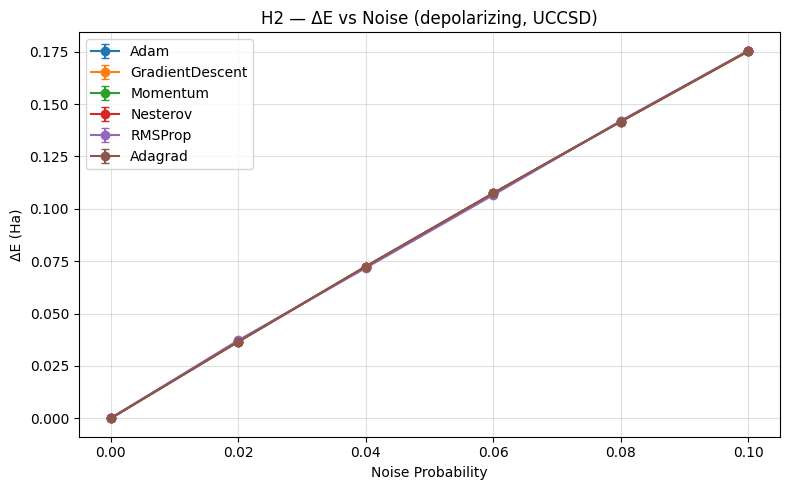

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/vqe/H2/noisy_optimizer_comparison_deltae_UCCSD_noise_scan_dep.png


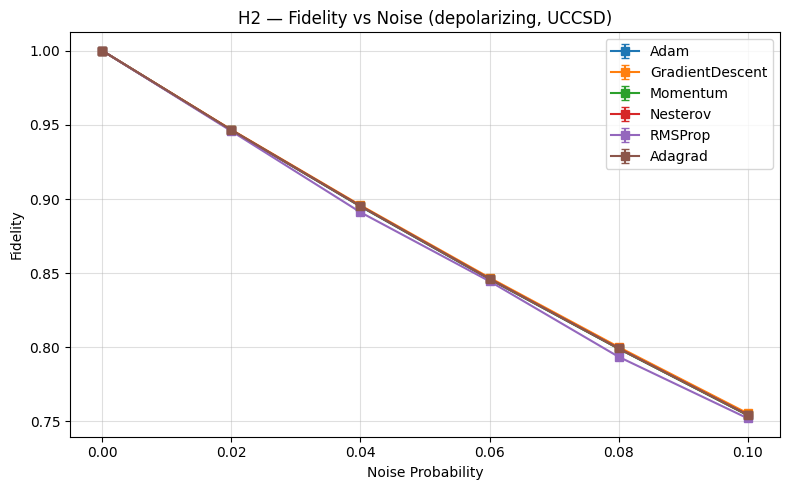

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/vqe/H2/noisy_optimizer_comparison_fidelity_UCCSD_noise_scan_dep.png


In [16]:
dep_results = run_vqe_optimizer_comparison(
    molecule=molecule,
    ansatz_name=ansatz_name,
    optimizers=optimizers,
    steps=steps,
    stepsize=stepsize_map,
    mode="noise_stats",
    noise_type="depolarizing",
    noise_levels=noise_levels,
    seeds=seeds,
    mapping=mapping,
    force=False,
    show=True,
    plot=True,
)


## Amplitude damping noise: optimizer comparison (multi-seed)

We now sweep amplitude damping probability `p` and set depolarizing to zero:

- `noise_type="amplitude"`


⚙️ Optimizer: Adam (stepsize=0.2)
  🔹 Computing noiseless references per seed...

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_uccsd_adam_noiseless_s0_a56aed30983c.json
  🔹 Sweeping noise levels...

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_uccsd_adam_noiseless_s0_a56aed30983c.json
    p_dep=0.00, p_amp=0.00: ΔE=0.000000 ± 0.000000, ⟨F⟩=1.0000 ± 0.0000

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_uccsd_adam_noisy_amp02_s0_8585f63b925e.json
    p_dep=0.00, p_amp=0.02: ΔE=0.024566 ± 0.000000, ⟨F⟩=0.9604 ± 0.0000

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_uccsd_adam_noisy_amp04_s0_34535eb60c26.json
    p_dep=0.00, p_amp=0.04: ΔE=0.049628 ± 0.000000, ⟨F⟩=0.9216 ± 0.0000

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_uccsd_adam_noisy_amp06_s0_2f73fdf3e244.json
    p_dep=0.00, p_amp=0.06: ΔE=0.075184 ± 

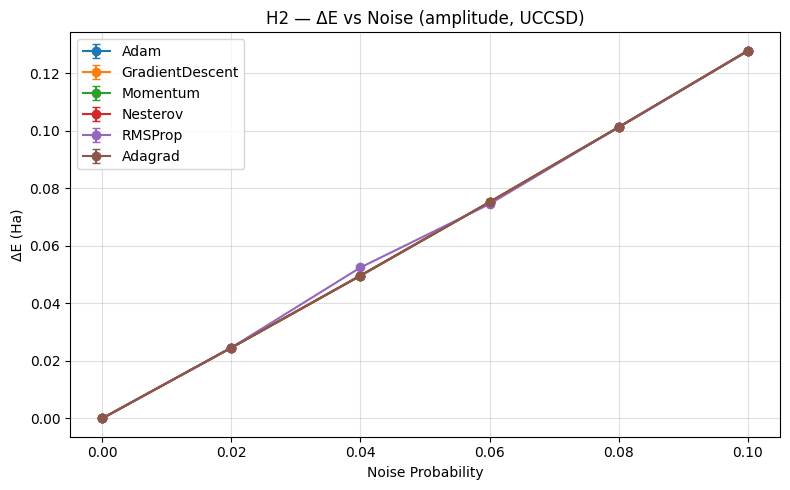

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/vqe/H2/noisy_optimizer_comparison_deltae_UCCSD_noise_scan_amp.png


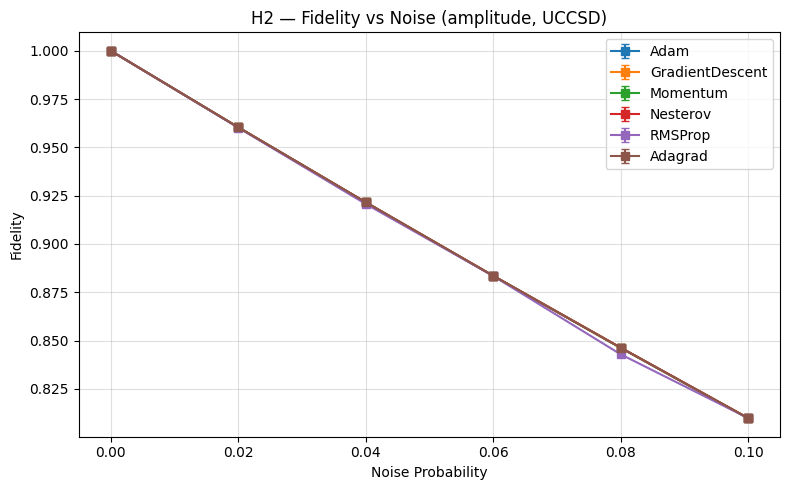

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/vqe/H2/noisy_optimizer_comparison_fidelity_UCCSD_noise_scan_amp.png


In [17]:
amp_results = run_vqe_optimizer_comparison(
    molecule=molecule,
    ansatz_name=ansatz_name,
    optimizers=optimizers,
    steps=steps,
    stepsize=stepsize_map,
    mode="noise_stats",
    noise_type="amplitude",
    noise_levels=noise_levels,
    seeds=seeds,
    mapping=mapping,
    force=False,
    show=True,
    plot=True,
)
